In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [50]:
data = pd.read_csv("dataset.csv")
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [51]:
data.shape

(300, 2)

In [52]:
X = data['x']
y = data['y']

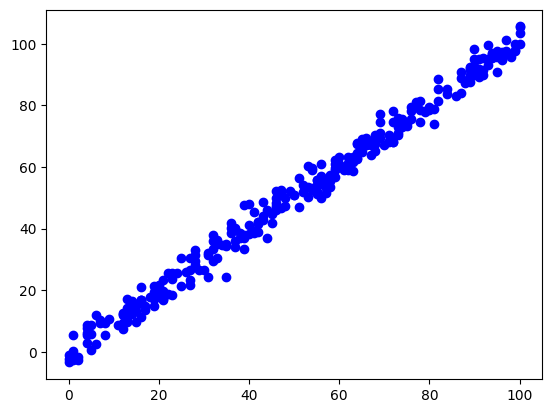

In [53]:
plt.scatter(X, y, c='b')

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

In [55]:
X_train.shape, X_test.shape

((240,), (60,))

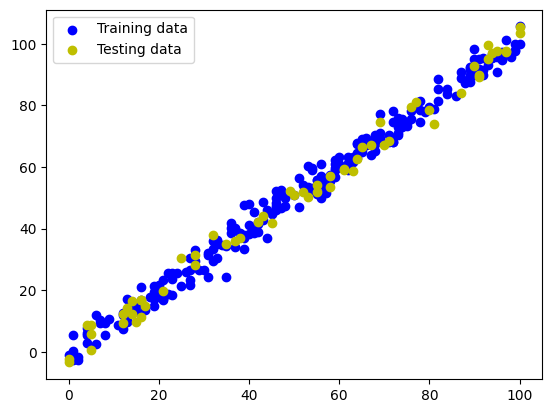

In [56]:
plt.scatter(X_train, y_train,c='b', label= 'Training data')
plt.scatter(X_test, y_test, c='y', label = 'Testing data')
plt.legend()

### Model Building

In [57]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape = (1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics= ['mae'])
# train model
epoch_number=10
history = model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=epoch_number)

Epoch 1/10


C:\Users\tinus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.2429 - mae: 44.2429  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3306 - mae: 9.3306   
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7833 - mae: 4.7833 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4647 - mae: 2.4647 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7944 - mae: 2.7944 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1528 - mae: 3.1528 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3856 - mae: 3.3856 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2681 - mae: 4.2681 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1536 - mae: 4.1536 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3667 - mae: 4.3667 


In [58]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [59]:
y_predictions = model.predict(X_test)
y_predictions[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[88.556816],
       [74.7378  ],
       [92.50511 ],
       [ 4.655657],
       [89.543884]], dtype=float32)

In [60]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

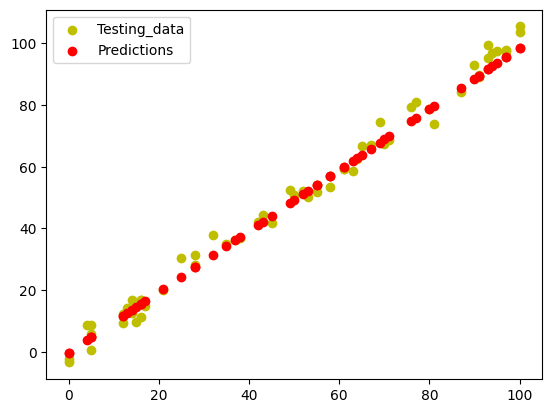

In [61]:
#plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test,y_test, c='y', label='Testing_data')
plt.scatter(X_test,y_predictions,c='r',label='Predictions')
plt.legend()

In [62]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7604 - mae: 2.7604 


[2.612743377685547, 2.612743616104126]

In [63]:
#mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_predictions))
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_predictions))
mae = mae_metric.result().numpy()
mae

2.6127436

In [64]:
y_predictions.shape,  y_test.shape,  tf.squeeze(y_predictions).shape

((60, 1), (60,), TensorShape([60]))

In [65]:
# mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions))
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_predictions))
mse = mse_metric.result().numpy()
mse

10.933484

In [66]:
history.history

{'loss': [30.9880428314209,
  8.59416675567627,
  4.135000228881836,
  2.4859395027160645,
  2.9620285034179688,
  3.180224657058716,
  3.339381456375122,
  3.880282402038574,
  4.08460807800293,
  3.9122426509857178],
 'mae': [30.9880428314209,
  8.59416675567627,
  4.135000228881836,
  2.4859395027160645,
  2.9620285034179688,
  3.180224657058716,
  3.339381456375122,
  3.880282402038574,
  4.08460807800293,
  3.9122426509857178]}

Text(0, 0.5, 'loss')

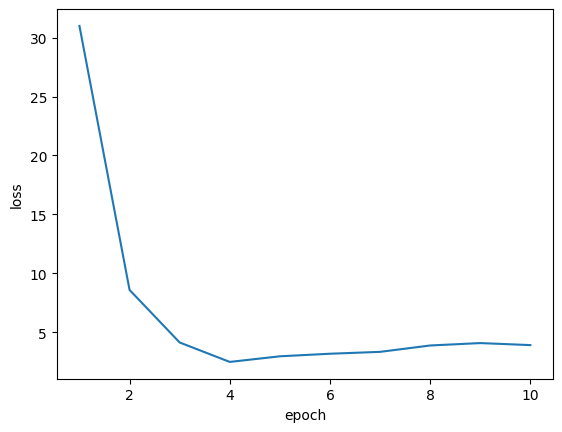

In [67]:
X_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(X_range,loss)
plt.xlabel('epoch')
plt.ylabel('loss')

In [68]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nweights:\n {weights} \nBiases:\n {biases}")


weights:
 [[ 2.6462907e-02 -7.1309485e-02  5.5882153e-03 -7.6234168e-03
   1.1066833e-02  3.8447988e-04 -4.8918467e-02  7.2438031e-04
  -7.3271409e-02  2.0708503e-01 -8.6833633e-02 -9.9750787e-02
   2.0442796e-01  3.8440164e-02 -2.1777551e-01 -3.7295617e-02
   2.4275573e-01 -1.5698422e-01 -7.3782854e-02  7.9957685e-03
  -1.1455184e-01 -4.6471721e-03 -7.9477653e-03  1.9006268e-04
  -4.7098111e-02 -1.7611945e-01  5.9423065e-03 -5.3850904e-02
  -1.0361921e-02  2.2467341e-02 -2.1742100e-03  3.1228498e-01
  -5.5665444e-03  2.0618412e-01 -1.9920115e-01 -1.1355804e-02
   1.9853024e-02  1.2420582e-01 -7.7938093e-05  1.3237490e-01
   1.0304613e-03 -8.8168308e-03 -6.9642277e-03 -1.2580764e-01
   5.1382553e-02 -3.2884595e-03  5.2873433e-02  7.0507623e-02
   1.7657941e-03 -6.4036553e-03  4.3662176e-02  2.3227841e-01
   2.4621151e-02 -1.3333738e-02  8.9263422e-03  1.2925387e-02
   2.7030667e-02  1.4084667e-01 -6.2295686e-02  1.6077442e-01
   2.6668748e-04  2.2273807e-02 -1.9242134e-02  3.0082404e-